In [8]:
import os
# change to project root
os.chdir("C:/Users/ajayram_231210006/FakeNews_Spam_Project")
print("Changed cwd to:", os.getcwd())

# confirm files
print("Files at project root:", os.listdir(".")[:50])
print("\nFiles in data/processed:", os.listdir("data/processed"))


Changed cwd to: C:\Users\ajayram_231210006\FakeNews_Spam_Project
Files at project root: ['.git', '.ipynb_checkpoints', 'app', 'data', 'notebooks', 'reports', 'src', 'venv']

Files in data/processed: ['clean_fake_news.csv', 'clean_sms_spam.csv']


In [6]:
import pandas as pd

# Reload SMS data
sms = pd.read_csv("data/processed/clean_sms_spam.csv")

# Map text labels to numeric
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})

# Save back the corrected file
sms.to_csv("data/processed/clean_sms_spam.csv", index=False)

print("✅ Labels converted successfully.")
print(sms['label'].value_counts())


✅ Labels converted successfully.
label
0    4818
1     747
Name: count, dtype: int64


In [10]:
import os

print("Current working directory:", os.getcwd())
print("\nFiles in data/processed/:")
if os.path.exists("data/processed"):
    print(os.listdir("data/processed"))
else:
    print("❌ Folder not found.")


Current working directory: C:\Users\ajayram_231210006\FakeNews_Spam_Project

Files in data/processed/:
['clean_fake_news.csv', 'clean_sms_spam.csv']


In [9]:
# Cell 1: imports and load processed data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# display options
pd.options.display.max_colwidth = 200
sns.set(style="whitegrid")

# paths
fake_path = "data/processed/clean_fake_news.csv"
sms_path  = "data/processed/clean_sms_spam.csv"

# load
fake = pd.read_csv(fake_path)
sms  = pd.read_csv(sms_path)

print("Fake shape:", fake.shape)
print("SMS shape: ", sms.shape)

# show top rows
display(fake.head())
display(sms.head())


Fake shape: (44182, 6)
SMS shape:  (5565, 3)


,title,text,subject,date,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committed a âCoup dâÃ©tatâ Against the Constitution,"21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocati...",US_News,"February 13, 2017",1,21st century wire say ben stein reputable professor pepperdine university also hollywood fame appearing tv show film ferris bueller day made provocative statement judge jeanine pirro show recently...
1,Trump drops Steve Bannon from National Security Council,"WASHINGTON (Reuters) - U.S. President Donald Trump removed his chief strategist Steve Bannon from the National Security Council on Wednesday, reversing his controversial decision early this year t...",politicsNews,"April 5, 2017",0,washington reuters u president donald trump removed chief strategist steve bannon national security council wednesday reversing controversial decision early year give political adviser unprecedent...
2,Puerto Rico expects U.S. to lift Jones Act shipping restrictions,"(Reuters) - Puerto Rico Governor Ricardo Rossello said on Wednesday he expected the federal government to waive the Jones Act, which would lift restrictions on ships that can provide aid to the is...",politicsNews,"September 27, 2017",0,reuters puerto rico governor ricardo rossello said wednesday expected federal government waive jones act would lift restriction ship provide aid island devastated hurricane maria said speaking mem...
3,OOPS: Trump Just Accidentally Confirmed He Leaked Israeli Intelligence To Russia (VIDEO),"On Monday, Donald Trump once again embarrassed himself and his country by accidentally revealing the source of the extremely classified information he leaked to Russia earlier this month.While it ...",News,"May 22, 2017",1,monday donald trump embarrassed country accidentally revealing source extremely classified information leaked russia earlier month speculated source information israel trump made thing crystal cle...
4,Donald Trump heads for Scotland to reopen a golf resort,"GLASGOW, Scotland (Reuters) - Most U.S. presidential candidates go abroad to sharpen their foreign policy credentials. Donald Trump arrives in Scotland on Friday to reopen a golf resort. The presu...",politicsNews,"June 24, 2016",0,glasgow scotland reuters u presidential candidate go abroad sharpen foreign policy credential donald trump arrives scotland friday reopen golf resort presumptive republican nominee 70 visit family...


,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives around here though",nah think go usf life around though


In [11]:
# Cell 2: basic info and class counts
def dataset_info(df, name):
    print(f"--- {name} ---")
    print("Columns:", df.columns.tolist())
    print("Missing values per column:\n", df.isnull().sum())
    print("Label counts:\n", df['label'].value_counts())
    print("Unique labels:", df['label'].unique())
    print()

dataset_info(fake, "Fake News (processed)")
dataset_info(sms, "SMS Spam (processed)")


--- Fake News (processed) ---
Columns: ['title', 'text', 'subject', 'date', 'label', 'clean_text']
Missing values per column:
 title         0
text          0
subject       0
date          0
label         0
clean_text    0
dtype: int64
Label counts:
 label
1    22766
0    21416
Name: count, dtype: int64
Unique labels: [1 0]

--- SMS Spam (processed) ---
Columns: ['label', 'text', 'clean_text']
Missing values per column:
 label         0
text          0
clean_text    0
dtype: int64
Label counts:
 label
0    4818
1     747
Name: count, dtype: int64
Unique labels: [0 1]



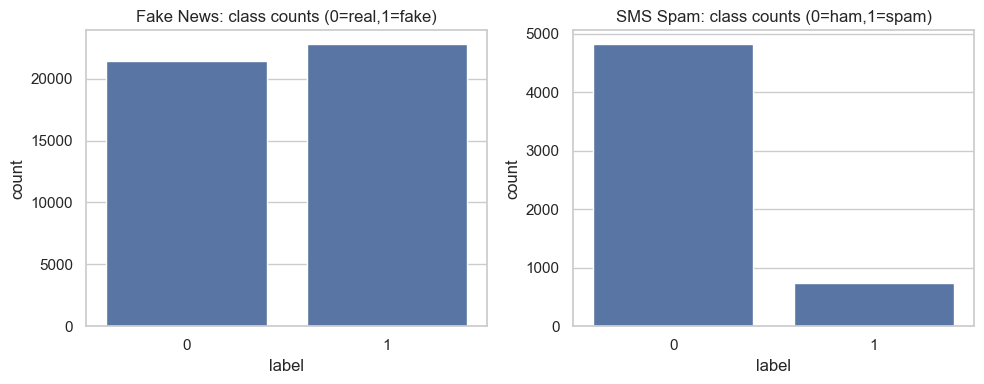

In [12]:
# Cell 3: class distribution plots
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x='label', data=fake)
plt.title("Fake News: class counts (0=real,1=fake)")

plt.subplot(1,2,2)
sns.countplot(x='label', data=sms)
plt.title("SMS Spam: class counts (0=ham,1=spam)")

plt.tight_layout()
plt.show()


Fake News: mean words = 242.39, median words = 213.0


count    44182.000000
mean       242.390000
std        208.123127
min          1.000000
25%        127.000000
50%        213.000000
75%        301.000000
max       5069.000000
Name: len_words, dtype: float64

SMS: mean words = 9.48, median words = 7.0


count    5565.000000
mean        9.479425
std         7.288756
min         1.000000
25%         4.000000
50%         7.000000
75%        14.000000
max        78.000000
Name: len_words, dtype: float64

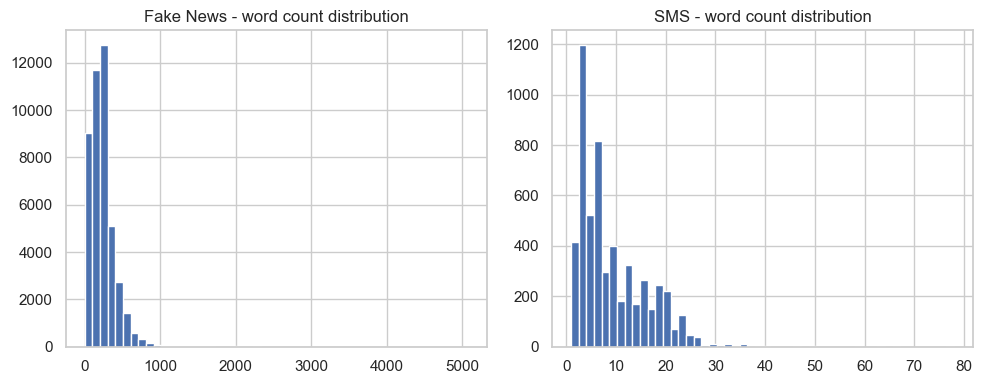

In [13]:
# Cell 4: text length distributions
for df, name in [(fake, "Fake News"), (sms, "SMS")]:
    df['len_words'] = df['clean_text'].apply(lambda x: len(str(x).split()))
    df['len_chars'] = df['clean_text'].apply(lambda x: len(str(x)))
    print(f"{name}: mean words = {df['len_words'].mean():.2f}, median words = {df['len_words'].median():.1f}")
    display(df['len_words'].describe())

# histograms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
fake['len_words'].hist(bins=50)
plt.title("Fake News - word count distribution")

plt.subplot(1,2,2)
sms['len_words'].hist(bins=50)
plt.title("SMS - word count distribution")

plt.tight_layout()
plt.show()


In [14]:
# Cell 5: top tokens per label
def top_tokens_by_label(df, label_value, top_n=25):
    texts = df[df['label']==label_value]['clean_text'].astype(str).tolist()
    cnt = Counter()
    for t in texts:
        cnt.update(t.split())
    return cnt.most_common(top_n)

print("Top tokens (Fake News = 1):")
display(top_tokens_by_label(fake, 1, 25))

print("Top tokens (Real News = 0):")
display(top_tokens_by_label(fake, 0, 25))

print("Top tokens (SMS Spam = 1):")
display(top_tokens_by_label(sms, 1, 25))

print("Top tokens (SMS Ham = 0):")
display(top_tokens_by_label(sms, 0, 25))


Top tokens (Fake News = 1):


[('trump', 79452),
 ('said', 33760),
 ('president', 28305),
 ('people', 26657),
 ('one', 25384),
 ('u', 24473),
 ('state', 23652),
 ('would', 23562),
 ('clinton', 19821),
 ('time', 19165),
 ('year', 19072),
 ('obama', 18796),
 ('like', 18648),
 ('american', 18101),
 ('donald', 17673),
 ('republican', 16726),
 ('say', 15781),
 ('also', 15403),
 ('right', 14858),
 ('news', 14614),
 ('new', 14368),
 ('image', 14311),
 ('hillary', 14123),
 ('even', 14012),
 ('white', 13563)]

Top tokens (Real News = 0):


[('said', 99062),
 ('trump', 54719),
 ('u', 47108),
 ('state', 37677),
 ('would', 31605),
 ('reuters', 28962),
 ('president', 28724),
 ('republican', 23007),
 ('year', 22621),
 ('government', 19992),
 ('house', 17029),
 ('new', 16917),
 ('also', 15954),
 ('united', 15590),
 ('people', 15356),
 ('party', 15294),
 ('election', 14755),
 ('official', 14620),
 ('told', 14245),
 ('country', 14161),
 ('one', 13750),
 ('could', 13711),
 ('washington', 12988),
 ('last', 12776),
 ('two', 12711)]

Top tokens (SMS Spam = 1):


[('call', 372),
 ('free', 224),
 ('2', 204),
 ('u', 176),
 ('txt', 161),
 ('ur', 144),
 ('text', 143),
 ('mobile', 139),
 ('4', 134),
 ('stop', 123),
 ('claim', 115),
 ('1', 111),
 ('reply', 105),
 ('c', 99),
 ('prize', 95),
 ('get', 86),
 ('tone', 86),
 ('min', 79),
 ('cash', 76),
 ('service', 73),
 ('send', 71),
 ('week', 69),
 ('new', 69),
 ('nokia', 67),
 ('150p', 65)]

Top tokens (SMS Ham = 0):


[('u', 1091),
 ('2', 326),
 ('gt', 318),
 ('lt', 316),
 ('get', 316),
 ('ok', 288),
 ('go', 278),
 ('call', 253),
 ('come', 248),
 ('ur', 247),
 ('know', 246),
 ('day', 244),
 ('like', 237),
 ('good', 236),
 ('got', 233),
 ('time', 227),
 ('love', 213),
 ('4', 190),
 ('want', 185),
 ('one', 175),
 ('need', 174),
 ('going', 169),
 ('home', 165),
 ('lor', 162),
 ('sorry', 157)]

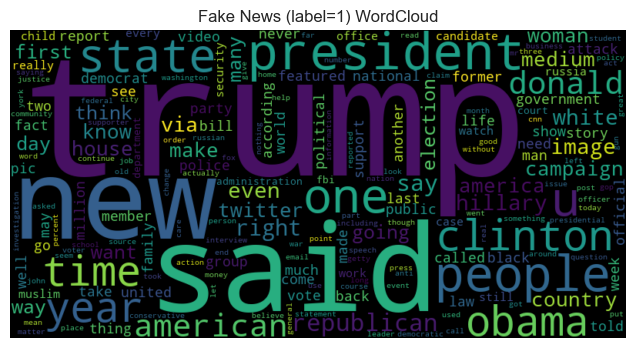

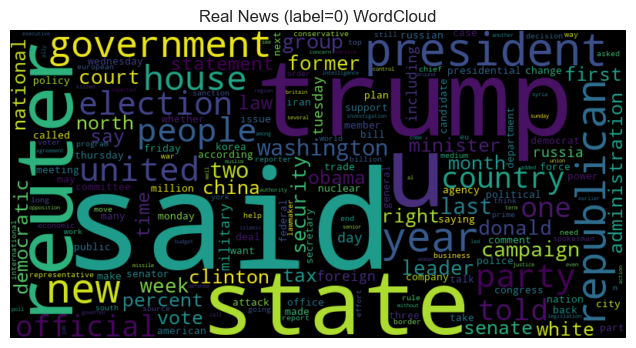

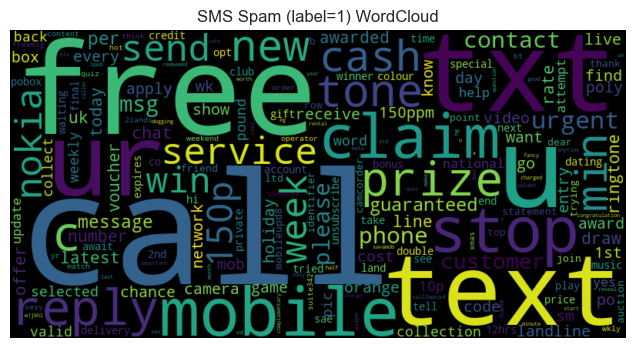

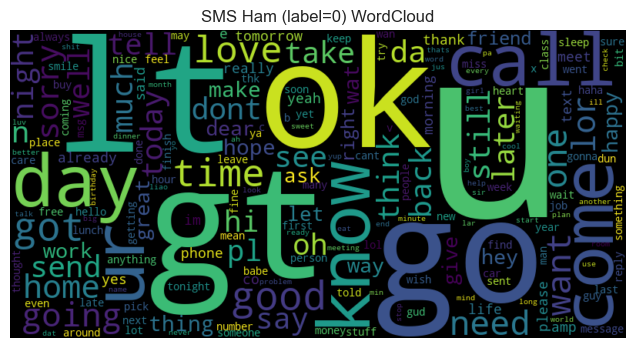

In [15]:
# Cell 6: Wordclouds
def show_wordcloud(text, title=None):
    wc = WordCloud(width=800, height=400, collocations=False).generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# Fake news - fake vs real
fake_text_fake = " ".join(fake[fake['label']==1]['clean_text'].astype(str).tolist())
fake_text_real = " ".join(fake[fake['label']==0]['clean_text'].astype(str).tolist())

show_wordcloud(fake_text_fake, "Fake News (label=1) WordCloud")
show_wordcloud(fake_text_real, "Real News (label=0) WordCloud")

# SMS - spam vs ham
sms_text_spam = " ".join(sms[sms['label']==1]['clean_text'].astype(str).tolist())
sms_text_ham  = " ".join(sms[sms['label']==0]['clean_text'].astype(str).tolist())

show_wordcloud(sms_text_spam, "SMS Spam (label=1) WordCloud")
show_wordcloud(sms_text_ham, "SMS Ham (label=0) WordCloud")


In [16]:
# Cell 7: duplicates check and sample rows
# duplicates
print("Fake duplicates (clean_text):", fake.duplicated(subset=['clean_text']).sum())
print("SMS duplicates (clean_text):", sms.duplicated(subset=['clean_text']).sum())

# drop duplicates for reporting samples (but don't overwrite processed files)
fake_unique = fake.drop_duplicates(subset=['clean_text']).reset_index(drop=True)
sms_unique  = sms.drop_duplicates(subset=['clean_text']).reset_index(drop=True)

# sample rows: 20 per label
def sample_rows(df, label_col='label', n=20):
    samples = []
    for lbl in sorted(df[label_col].unique()):
        tmp = df[df[label_col]==lbl].sample(n=min(n, len(df[df[label_col]==lbl])), random_state=42)
        samples.append(tmp)
    return pd.concat(samples)

fake_samples = sample_rows(fake_unique)
sms_samples  = sample_rows(sms_unique)

# save
os.makedirs("reports", exist_ok=True)
fake_samples.to_csv("reports/sample_rows_fake.csv", index=False)
sms_samples.to_csv("reports/sample_rows_sms.csv", index=False)
print("Saved samples to reports/")


Fake duplicates (clean_text): 5868
SMS duplicates (clean_text): 462
Saved samples to reports/


In [17]:
# Cell 8: create dataset summary markdown
fake_counts = fake['label'].value_counts().to_dict()
sms_counts = sms['label'].value_counts().to_dict()

summary_lines = [
    "# Dataset Summary\n",
    "## Fake News (processed)\n",
    f"- Rows: {fake.shape[0]}\n",
    f"- Label counts: {fake_counts}\n",
    f"- Avg words: {fake['len_words'].mean():.2f}, median words: {fake['len_words'].median():.1f}\n",
    "\n## SMS Spam (processed)\n",
    f"- Rows: {sms.shape[0]}\n",
    f"- Label counts: {sms_counts}\n",
    f"- Avg words: {sms['len_words'].mean():.2f}, median words: {sms['len_words'].median():.1f}\n",
    "\n## Key observations (add your notes below)\n",
    "- Observation 1: (e.g., SMS spam often contains short messages and tokens like 'free', 'win', 'http')\n",
    "- Observation 2: (e.g., Fake news tends to have longer text than SMS.)\n",
    "- Observation 3: (e.g., class imbalance in SMS dataset — fewer spam than ham)\n"
]

with open("reports/dataset_summary.md", "w", encoding="utf-8") as f:
    f.writelines(summary_lines)

print("Saved reports/dataset_summary.md")
print("Contents:")
print("".join(summary_lines))


Saved reports/dataset_summary.md
Contents:
# Dataset Summary
## Fake News (processed)
- Rows: 44182
- Label counts: {1: 22766, 0: 21416}
- Avg words: 242.39, median words: 213.0

## SMS Spam (processed)
- Rows: 5565
- Label counts: {0: 4818, 1: 747}
- Avg words: 9.48, median words: 7.0

## Key observations (add your notes below)
- Observation 1: (e.g., SMS spam often contains short messages and tokens like 'free', 'win', 'http')
- Observation 2: (e.g., Fake news tends to have longer text than SMS.)
- Observation 3: (e.g., class imbalance in SMS dataset — fewer spam than ham)

